# Kaggle 데이터를 활용한 lenet

In [1]:
from tensorflow.keras import layers, models
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

tf.random.set_seed(0)

#### Train데이터 불러오기(gpu 메모리 문제로, 회색조로 불러옴)

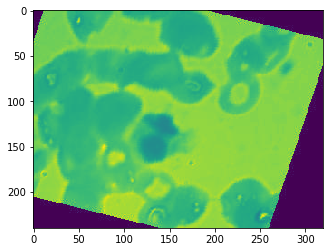

In [2]:
#학습데이터 저장경로
TRAIN_DATADIR = 'C:/Users/jaebyung.lee/Desktop/Python/cellimage/TRAIN'

#학습데이터 범주
CATEGORIES = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']


### training data plt
for category in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #컬러 (cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [3]:
#학습데이터 불러오기
training_data = []
IMG_SIZE = 50 #이미지 사이즈 50*50
CHANNEL = 1 #채널 수, gpu 문제로 회색조만 불러옴

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DATADIR, category) #path
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #컬러 (cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
len(training_data)

#학습 데이터 무작위로 섞어주기
import random
random.shuffle(training_data)
print('length:',len(training_data))

length: 2694


In [4]:
#X,y 로 나눠주기
TRAIN_X = []
TRAIN_y = []

for features, label in training_data:
    TRAIN_X.append(features)
    TRAIN_y.append(label)    

TRAIN_X = np.array(TRAIN_X).reshape(-1, IMG_SIZE, IMG_SIZE ,CHANNEL)
TRAIN_y = np.array(TRAIN_y)
print(TRAIN_X.shape)
print(TRAIN_y.shape)

(2694, 50, 50, 1)
(2694,)


#### Validation 데이터 (Train데이터와 같은 방법으로 불러오기)

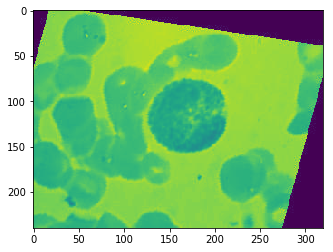

In [5]:
##############################################################################
###                          valid data                                    ###
##############################################################################
VALID_DATADIR = 'C:/Users/jaebyung.lee/Desktop/Python/cellimage/VALID'
CATEGORIES = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']


### training data plt
for category in CATEGORIES:
    path = os.path.join(VALID_DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [6]:
################ create training data#########################################
valid_data = []

def create_valid_data():
    for category in CATEGORIES:
        path = os.path.join(VALID_DATADIR, category) #path
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                valid_data.append([new_array, class_num])
            except Exception as e:
                pass
create_valid_data()
len(valid_data)
random.shuffle(valid_data)

In [7]:
#X,y 로 나눠주기
VALID_X = []
VALID_y = []

for features, label in valid_data:
    VALID_X.append(features)
    VALID_y.append(label)    

VALID_X = np.array(VALID_X).reshape(-1, IMG_SIZE, IMG_SIZE ,CHANNEL)
VALID_y = np.array(VALID_y)
print(VALID_X.shape)
print(VALID_y.shape)

(1600, 50, 50, 1)
(1600,)


#### Test데이터 (Train데이터와 마찬가지로 불러옴, 메모리 문제로 예제에서는 사용X)

In [8]:
###############################################################################
####                           test data                                    ###
###############################################################################
#TEST_DATADIR = 'C:/Users/jaebyung.lee/Desktop/Python/cellimage/TEST'
#CATEGORIES = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']
#
#
#### training data plt
#for category in CATEGORIES:
#    path = os.path.join(TEST_DATADIR, category)
#    for img in os.listdir(path):
#        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
#        plt.imshow(img_array)
#        plt.show()
#        break
#    break
#
#
################# create training data#########################################
#test_data = []
#IMG_SIZE = 224
#
#def create_test_data():
#    for category in CATEGORIES:
#        path = os.path.join(TEST_DATADIR, category) #path
#        class_num = CATEGORIES.index(category)
#        for img in os.listdir(path):
#            try:
#                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
#                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#                test_data.append([new_array, class_num])
#            except Exception as e:
#                pass
#create_test_data()
#len(test_data)
#random.shuffle(test_data)
################################################################################
#TEST_X = []
#TEST_y = []
#
#for features, label in test_data:
#    TEST_X.append(features)
#    TEST_y.append(label)    
#
#TEST_X = np.array(TEST_X).reshape(-1, IMG_SIZE, IMG_SIZE ,CHANNEL)
#TEST_y = np.array(TEST_y)


#### Convert from uint8 to float32 and normalize images value from [0, 255] to [0, 1].

In [9]:
# normalize images value from [0, 255] to [0, 1].
x_train = tf.convert_to_tensor(TRAIN_X, dtype=tf.float32) / 255.
x_valid = tf.convert_to_tensor(VALID_X, dtype=tf.float32) / 255.
#x_test = tf.convert_to_tensor(TEST_X, dtype=tf.float32) / 255.

print(x_train[0].shape)
print(x_valid[0].shape)
#x_test[0].shape

(50, 50, 1)
(50, 50, 1)


#### lenet

In [10]:
##########################################################################
###                             lenet                                  ###
#########################################################################

from tensorflow.keras import layers, Sequential

lenet = Sequential([
    # convolutional layer
    layers.Conv2D(6, (5, 5), padding='VALID',kernel_regularizer=tf.keras.regularizers.l2(0.04)),
    layers.Activation('relu'),
    # pooling layer
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    # convolutional layer
    layers.Conv2D(16, (5, 5), padding='VALID',kernel_regularizer=tf.keras.regularizers.l2(0.04)),
    layers.Activation('relu'),
    # pooling layer
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(32, (5, 5), padding='VALID',kernel_regularizer=tf.keras.regularizers.l2(0.04)),
    layers.Activation('relu'),
    # pooling layer
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    # flatten layer
    layers.Flatten(),
    # dropout
    layers.Dropout(0.1),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(4)])
# [batch_size, image_width, image_height, channels]
lenet.build(input_shape=(None, IMG_SIZE, IMG_SIZE, CHANNEL))
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  156       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  2416      
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  1

#### Loss 함수 Accuracy 함수 정의

In [11]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Convert labels to int 64 for tf cross-entropy function.
    y_true = tf.cast(y_true, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, 
                                                          logits=y_pred)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### 학습 옵션

In [12]:
# Parameters for Training
learning_rate = 0.0001
batch_size = 16
training_steps = 100

# Adam optimizer.
optimizer = tf.optimizers.Adam(learning_rate)

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, TRAIN_y))
training_batch = train_data.batch(batch_size).repeat(training_steps)

#### 학습 및 정확도 확인

In [13]:
# Training parameters.
display_step = 1000


# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(training_batch, 1):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = lenet(batch_x)
        loss = cross_entropy(pred, batch_y)

    # Compute gradients.
    trainable_variables = lenet.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    if step % display_step == 0:
        v_pred = lenet(x_valid)
        v_loss = cross_entropy(v_pred, VALID_y)
        v_acc = accuracy(v_pred, VALID_y)
        print("step: %i, train_loss: %f, val_loss: %f, val_accuracy: %f" % (step, loss, v_loss, v_acc))

step: 1000, train_loss: 1.278321, val_loss: 1.338981, val_accuracy: 0.319375
step: 2000, train_loss: 1.215546, val_loss: 1.221862, val_accuracy: 0.413750
step: 3000, train_loss: 1.224561, val_loss: 1.103776, val_accuracy: 0.488750
step: 4000, train_loss: 0.898292, val_loss: 1.056566, val_accuracy: 0.505000
step: 5000, train_loss: 0.943935, val_loss: 1.035533, val_accuracy: 0.522500
step: 6000, train_loss: 0.812122, val_loss: 1.018471, val_accuracy: 0.532500
step: 7000, train_loss: 0.656787, val_loss: 1.039841, val_accuracy: 0.513750
step: 8000, train_loss: 0.742872, val_loss: 0.996851, val_accuracy: 0.554375
step: 9000, train_loss: 0.877462, val_loss: 1.034737, val_accuracy: 0.530000
step: 10000, train_loss: 0.933176, val_loss: 1.016658, val_accuracy: 0.548125
step: 11000, train_loss: 0.660904, val_loss: 1.000230, val_accuracy: 0.556875
step: 12000, train_loss: 0.681772, val_loss: 1.030833, val_accuracy: 0.547500
step: 13000, train_loss: 0.613483, val_loss: 1.016260, val_accuracy: 0.56